# Bank Customer Churn Model

# Objective

1.Data Encoding

2.Feature Scaling

3.Handling Imbalance Data

    a.Random Under Sampling
    
    b.Random Over Sampling
    
4.Support Vector Machine Classifier

5.Grid Search For Hyperparameter Tunning

# Data Source

    There are 13 fearures in the dataset:
    
    1.CustomerId
    
    2.Surname 
    
    3.CreditScore
    
    4.Geography
    
    5.Gender
    
    6.Age
    
    7.Tenure
    
    8.Balance
    
    9.Num Of Products
    
    10Has Credit Card
    
    11.Is Active Member
    
    12.Estimated Salary
    
    13.Churn

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [3]:
df = pd.read_csv('Bank Churn Modelling.csv')

In [4]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


# Describing Data

In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.duplicated('CustomerId').sum()

0

In [8]:
df.set_index('CustomerId')

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df.replace({'Geography':{'France':2 , 'Germany':1 , 'Spain':0}},inplace=True)

In [12]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
df.replace({'Gender':{'Male':0 , 'Female':1}},inplace=True)

In [14]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [15]:
df.replace({'Num Of Products':{1:0 , 2:1 , 3:1 , 4:1}} , inplace=True)

In [16]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [17]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [18]:
df.loc[(df['Balance']==0) , 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

# Feature Engineering

In [19]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

In [20]:
df['Zero Balance']

0       0
1       1
2       1
3       0
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    1
Name: Zero Balance, Length: 10000, dtype: int32

<AxesSubplot:>

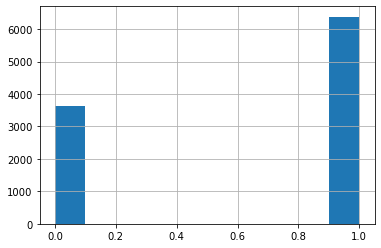

In [21]:
df['Zero Balance'].hist()

In [24]:
df.groupby(['Churn' , 'Geography']).count()

CustomerId  Surname  CreditScore  Gender   Age  Tenure  \
Churn Geography                                                           
0     0                2064     2064         2064    2064  2064    2064   
      1                1695     1695         1695    1695  1695    1695   
      2                4204     4204         4204    4204  4204    4204   
1     0                 413      413          413     413   413     413   
      1                 814      814          814     814   814     814   
      2                 810      810          810     810   810     810   

                 Balance  Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                                
0     0             2064             2064             2064              2064   
      1             1695             1695             1695              1695   
      2             4204             4204             4204              4204   
1     0              413              413              413               413   
      1              814              814              814               814   
      2              810              810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [25]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

# Feature Engineering

In [26]:
x = df.drop(['Surname' , 'Churn'] , axis=1)

In [27]:
y = df['Churn']

In [28]:
x.shape , y.shape

((10000, 12), (10000,))

In [29]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

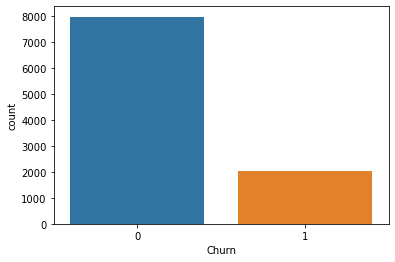

In [30]:
sns.countplot(x='Churn' , data=df)

# Random Under Sampling

In [39]:
from imblearn.under_sampling import RandomUnderSampler

In [40]:
rus = RandomUnderSampler(random_state=2529)

In [41]:
x_rus , y_rus = rus.fit_resample(x, y)

In [42]:
x_rus.shape , y_rus.shape , x.shape , y.shape 

((4074, 12), (4074,), (10000, 12), (10000,))

In [43]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [44]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

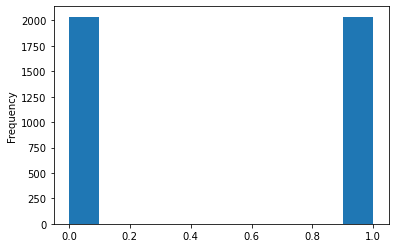

In [45]:
y_rus.plot(kind = 'hist')

# Random Oversampling

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
ros = RandomOverSampler(random_state = 2529)

In [51]:
x_ros , y_ros = ros.fit_resample(x , y)

In [53]:
x_ros.shape , y_ros.shape , x.shape ,y.shape

((15926, 12), (15926,), (10000, 12), (10000,))

In [55]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [56]:
y_ros.value_counts()

0    7963
1    7963
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

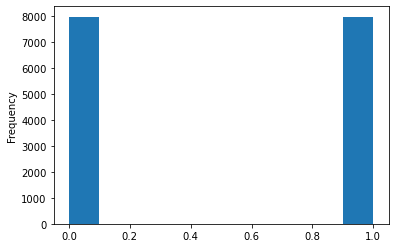

In [57]:
y_ros.plot(kind='hist')

# Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

# Splitting original Data

In [59]:
x_train , x_test , y_train ,y_test =train_test_split(x , y, test_size=0.3 , random_state=2529)

# Splitting Random under sample Data 

In [61]:
x_train_rus , x_test_rus , y_train_rus ,y_test_rus =train_test_split(x_rus , y_rus, test_size=0.3 , random_state=2529)

# Splitting Random Over sample Data

In [ ]:
x_train_ros , x_test_ros , y_train_ros ,y_test_ros =train_test_split(x_ros , y_ros, test_size=0.3 , random_state=2529)

# Standardize Features

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc = StandardScaler()

# Standardize Original Data

In [66]:
x_train[['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'Estimated Salary']] = sc.fit_transform(x_train[['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'Estimated Salary']])

In [67]:
x_test[['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'Estimated Salary']] = sc.fit_transform(x_test[['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'Estimated Salary']])

# Standardize Random Under sample data

In [68]:
x_train_rus[['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'Estimated Salary']])

In [69]:
x_test_rus[['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'Estimated Salary']])

# Standardize Random Over sample data

In [70]:
x_train_ros[['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'Estimated Salary']])

In [71]:
x_test_ros[['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'Estimated Salary']])

# Support Vector Machine Classifier

In [73]:
from sklearn.svm import SVC

In [74]:
svc = SVC()

In [85]:
svc.fit(x_train , y_train)

SVC()

In [86]:
y_pred = svc.predict(x_test)

# Model Accuracy

In [87]:
from sklearn.metrics import confusion_matrix , classification_report

In [88]:
confusion_matrix(y_test , y_pred)

array([[2414,    0],
       [ 586,    0]], dtype=int64)

In [89]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



C:\Users\M.GANESH KUMAR REDDY\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.GANESH KUMAR REDDY\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.GANESH KUMAR REDDY\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [90]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_grid = {'C':[0.1 , 1 , 10],'gamma':[1,0.1,0.01] , 'kernel':['rbf'] , 'class_weight':['balanced']}

In [94]:
grid = GridSearchCV(SVC() , param_grid , refit =True ,verbose=2 , cv=2)
grid.fit(x_train , y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [95]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [96]:
grid_predicitons = grid.predict(x_test)

In [97]:
confusion_matrix(y_test , grid_predicitons)

array([[2414,    0],
       [ 586,    0]], dtype=int64)

In [99]:
print(classification_report(y_test , grid_predicitons))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



C:\Users\M.GANESH KUMAR REDDY\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.GANESH KUMAR REDDY\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.GANESH KUMAR REDDY\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

# Model with Random Under sampling

In [100]:
svc_rus = SVC()

In [101]:
svc_rus.fit(x_train_rus , y_train_rus)

SVC()

In [102]:
y_pred_rus =svc_rus.predict(x_test_rus)

# Model Accuracy

In [104]:
confusion_matrix(y_test_rus , y_pred_rus)

array([[  0, 627],
       [  0, 596]], dtype=int64)

In [105]:
print(classification_report(y_test_rus , y_pred_rus))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.49      1.00      0.66       596

    accuracy                           0.49      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.24      0.49      0.32      1223



C:\Users\M.GANESH KUMAR REDDY\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.GANESH KUMAR REDDY\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.GANESH KUMAR REDDY\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [106]:
param_grid = {'C':[0.1 , 1 , 10],'gamma':[1,0.1,0.01] , 'kernel':['rbf'] , 'class_weight':['balanced']}

In [107]:
grid_rus = GridSearchCV(SVC() , param_grid , refit =True ,verbose=2 , cv=2)
grid_rus.fit(x_train_rus , y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [108]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [109]:
grid_predicitons_rus = grid.predict(x_test_rus)

In [110]:
confusion_matrix(y_test_rus , grid_predicitons_rus)

array([[627,   0],
       [162, 434]], dtype=int64)

In [111]:
print(classification_report(y_test_rus , grid_predicitons_rus))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89       627
           1       1.00      0.73      0.84       596

    accuracy                           0.87      1223
   macro avg       0.90      0.86      0.86      1223
weighted avg       0.89      0.87      0.86      1223



# Model with Random Over Sampling

In [112]:
svc_ros = SVC()

In [113]:
svc_ros.fit(x_train_ros , y_train_ros)

SVC()

In [114]:
y_pred_ros = svc_ros.predict(x_test_ros)

# Model Accuracy

In [115]:
confusion_matrix(y_test_ros , y_pred_ros)

array([[2379,    0],
       [2399,    0]], dtype=int64)

In [116]:
print(classification_report(y_test_ros , y_pred_ros))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2379
           1       0.00      0.00      0.00      2399

    accuracy                           0.50      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.25      0.50      0.33      4778



C:\Users\M.GANESH KUMAR REDDY\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.GANESH KUMAR REDDY\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.GANESH KUMAR REDDY\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

# Hyperparameter Tunning

In [117]:
param_grid = {'C':[0.1 , 1 , 10],'gamma':[1,0.1,0.01] , 'kernel':['rbf'] , 'class_weight':['balanced']}

In [118]:
grid_ros = GridSearchCV(SVC() , param_grid , refit =True ,verbose=2 , cv=2)
grid_ros.fit(x_train_ros , y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  17.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  12.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  13.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  13.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  13.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  13.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=  12.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=  14.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  13.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  12.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  12.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [119]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [120]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [121]:
confusion_matrix(y_test_ros , grid_predictions_ros)

array([[2379,    0],
       [ 125, 2274]], dtype=int64)

In [122]:
print(classification_report(y_test_ros , grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2379
           1       1.00      0.95      0.97      2399

    accuracy                           0.97      4778
   macro avg       0.98      0.97      0.97      4778
weighted avg       0.98      0.97      0.97      4778

